In [1]:
import numpy as np
import glob
import os
from skimage import io
import matplotlib.pyplot as plt

In [2]:
filepath = './imagensteste/' #diretório onde as imagens estão
os.chdir(filepath)

O código na célula abaixo lê todos os arquivos de imagem .bmp em escala de cinza no diretório escolhido e cria um tensor de 3 dimensões (armazenado na variável imgfiles), no qual a primeira dimensão representa a imagem e a segunda e terceira dimensões são os pixels da imagem selecionada. 

In [3]:
imgfileslist = glob.glob('*.bmp')
imgfiles = []
for img in imgfileslist:
    imgfiles += [io.imread(img, as_gray=True)]
imgfiles = np.array(imgfiles)

As duas células abaixo são um teste. Na primeira calculamos o desvio padrão direto do primeiro subparalelepipedo de base quadrada de lado 8 e altura 4 (numero de imagens na pasta). Na segunda célula, calculamos primeiro a média dos pixels no subquadrado de cada imagem e depois calculamos o desvio padrão do array de dimensão quatro onde cada elemento é média previamente calculada. Valores parecidos mas não iguais. Posteriormente definimos duas funções similares cuja única diferença são essas duas formas de calcular os desvio padrão dos subparalelepipedos.

In [11]:
%%timeit
imgfiles[:,0:8,0:8].std() #calculo um pouco mais rápido que o segundo método

30.6 µs ± 2.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%%timeit
np.array([imgfiles[i,0:8,0:8].mean() for i, _ in enumerate(imgfiles)]).std() # cálculo um pouco mais lento

57.8 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Aqui obtemos o tamanho dos lados das imagens e definimos o tamanho dos subquadrados dentro dos quais medimos os desvios padrões. Por fim calculamos o tamanho da imagem final, onde cada pixel representa o desvio padrão observados num subquadrado selecionado de todas as imagens. Aqui supomos que todas as imagens são quadradas com shapes iguais.

In [6]:
squareImagePxlLength = imgfiles[0,0,:].size #supondo que todas as imagens são quadradas com lados de tamanho igual
subSquarePxlLength = 8 #tamanho do subquadrado escolhido seria 8 a principio
finalSquareStdImgLength = squareImagePxlLength//subSquarePxlLength

Funções que geram a imagem onde cada pixel representa o desvio padrão de cada subquadrado. A primeira calcula o desvio padrão direto e a segunda calcula as médias e depois os desvios padrão.

In [7]:
def createSquareStdImg(imgTensor, sqImgPxlLength, subSqLength):
    finalSqStdImgLength = sqImgPxlLength//subSqLength
    stdImage = np.zeros((finalSqStdImgLength,finalSqStdImgLength))
    for i in range(0,sqImgPxlLength,subSqLength):
        for j in range(0, sqImgPxlLength, subSqLength):
            stdImage[i//subSqLength,j//subSqLength] = imgTensor[:,i:i+subSqLength,j:j+subSqLength].std()
    return stdImage

In [8]:
def createSquareStdImg2(imgTensor, sqImgPxlLength, subSqLength):
    finalSqStdImgLength = sqImgPxlLength//subSqLength
    stdImage = np.zeros((finalSqStdImgLength,finalSqStdImgLength))
    for i in range(0,sqImgPxlLength,subSqLength):
        for j in range(0, sqImgPxlLength, subSqLength):
            stdImage[i//subSqLength,j//subSqLength] = np.array([imgTensor[l,i:i+subSqLength,j:j+subSqLength].mean() for l,_ in enumerate(imgTensor)]).std()
    return stdImage

Por fim, temos os resultados visuais da imagem com desvios padrão. A primeira foi obtida a partir do cáculo direto do StD e a segunda foi obtida com o método de dois passos (cálculo da média e depois do StD).

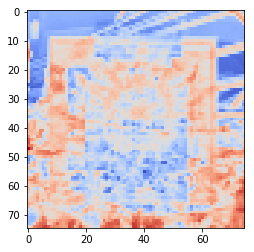

In [17]:
#primeiro método
stdImg = createSquareStdImg(imgfiles, squareImagePxlLength, subSquarePxlLength)
plt.imshow(stdImg, cmap='coolwarm')
plt.show()

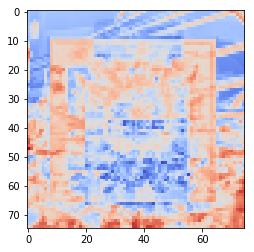

In [15]:
#segundo método
stdImg2 = createSquareStdImg2(imgfiles, squareImagePxlLength, subSquarePxlLength)
plt.imshow(stdImg2, cmap='coolwarm')
plt.show()

Os resultados são muito parecidos. O segundo cáculo é mais demorado, pois não é tão otimizado quanto o primeiro, cujo cálculo do std é feito usando funções dos arrays do numpy.

In [22]:
io.imsave('./../method1.bmp', stdImg)
io.imsave('./../method2.bmp', stdImg2)

/home/caio/.local/lib/python3.5/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
